#Import TensorFLow

In [13]:
import tensorflow as tf
# tf.logging.set_verbosity(tf.logging.ERROR)
print("Using tensorflow version", tf.__version__)

Using tensorflow version 2.0.0


#Import DataSet

In [15]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 189s 16us/step


 #Check the size 

In [22]:
print("x_train: ", x_train.shape)
print("y_train: ", y_train.shape)
print("x_test: ", x_test.shape)
print("y_trest", y_test.shape)

#here the 28,28 means the width and the height of the data

x_train:  (60000, 28, 28)
y_train:  (60000,)
x_test:  (10000, 28, 28)
y_trest (10000,)


#Plot Images Examples


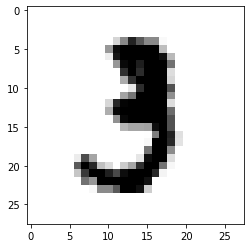

In [21]:
from matplotlib import pyplot as plt
%matplotlib inline 

#cmap to make for binary (black and white)
plt.imshow(x_train[10], cmap='binary')
plt.show()

#display the lables

In [23]:
y_train[10]

3

#check the y labales. python set 

In [36]:
print(set(y_train))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


#One Hot Encoding 
this is to covert every label into list of 10 elements, it let the relavalt lable as one and other element of the list as 0 

5 = [0,0,0,0,1,0,0,0,0,0]

7 = [0,0,0,0,0,0,1,0,0,0]

In [38]:
from tensorflow.keras.utils import to_categorical
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

#validate using the shape

In [39]:
print("y_train_encoded: ",y_train_encoded.shape)
print("y_test_encoded: ", y_test_encoded.shape)

y_train_encoded:  (60000, 10)
y_test_encoded:  (10000, 10)


#Dispaly Encodede Labales 

In [41]:
y_train_encoded[10]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

# preprocessing 

#Uncrolling N-dimensional Arrays to Vectors 

In [43]:
import numpy as np
x_train_reshape = np.reshape(x_train,(60000,784))
x_test_reshape = np.reshape(x_test, (10000,784))

print("x_train_reshape: ", x_train_reshape.shape)
print("x_test_reshape: ", x_test_reshape.shape)

x_train_reshape:  (60000, 784)
x_test_reshape:  (10000, 784)


#Display pixel values

Below displays the set of pixel values the image 1 

In [45]:
print(set(x_train_reshape[1]))

{0, 6, 7, 10, 12, 19, 21, 25, 28, 29, 37, 38, 47, 48, 50, 51, 54, 56, 57, 60, 63, 71, 75, 76, 79, 84, 85, 86, 96, 112, 114, 121, 122, 128, 130, 131, 135, 141, 145, 146, 148, 159, 162, 163, 165, 167, 168, 173, 178, 179, 186, 189, 190, 195, 196, 198, 199, 202, 208, 215, 223, 224, 225, 227, 228, 229, 230, 233, 237, 238, 239, 240, 243, 246, 249, 252, 253, 255}


#Data Normalization (to perform the processing efficently) 

we use epsilon to reduce the effect of having small std vaule

here we have used same x_mean and the x_std for the both x_test_reshape and the x_test_reshape data sets, reseon is we need to do same preprocessing for both data sets, trying to normalized the x_test_reshape data set by it's mean and the std let to have the impact of the annomalies on the x_test_reshape data sets over the x_train_reshape dataset

In [46]:
x_mean = np.mean(x_train_reshape)
x_std= np.std(x_train_reshape)

epsilon = 1e-10

x_train_norm = (x_train_reshape - x_mean) / (x_std +epsilon)
x_test_norm = (x_test_reshape - x_mean ) / (x_std + epsilon)

#Display Normalized pixel values 

In [47]:
print(set(x_train_norm[0]))

{-0.38589016215482896, 1.306921966983251, 1.17964285952926, 1.803310486053816, 1.6887592893452241, 2.8215433456857437, 2.719720059722551, 1.1923707702746593, 1.7396709323268205, 2.057868700961798, 2.3633385588513764, 2.096052433197995, 1.7651267538176187, 2.7960875241949457, 2.7451758812133495, 2.45243393406917, 0.02140298169794222, -0.22042732246464067, 1.2305545025108566, 0.2759611966059242, 2.210603629906587, 2.6560805059955555, 2.6051688630139593, -0.4240738943910262, 0.4668798577869107, 0.1486820891519332, 0.3905123933145161, 1.0905474843114664, -0.09314821501064967, 1.4851127174188385, 2.7579037919587486, 1.5360243604004349, 0.07231462467953861, -0.13133194724684696, 1.294194056237852, 0.03413089244334132, 1.3451056992194483, 2.274243183633583, -0.24588314395543887, 0.772349715676489, 0.75962180493109, 0.7214380726948927, 0.1995937321335296, -0.41134598364562713, 0.5687031437501034, 0.5941589652409017, 0.9378125553666773, 0.9505404661120763, 0.6068868759863008, 0.4159682148053143

# Create the model 

Two hidden layers and one output layers

In Sequential model no needs to indicate the input layer 

Hidden layers : 128 hidden units, relu activation function (simple linear function for the all the positive values and it converts the all the negative values to zero) 

Note - second hidden layer considered the input from the first hidden layer so no need to the indicate the input_shape for the second hidden layer. 

Output layer : 10 nodes and the softmax activation fuction (Gives us the probabilty scores for the various nodes, here it gives the probabilty score for the 10 classes as we created 10 classes in the output) 

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)), 
    Dense(128, activation='relu'),
    Dense(10, activation='softmax') 
])

2022-12-11 10:18:49.231480: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-11 10:18:49.237333: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


#Compling the model 

use the sdg optimizer algo, it reduce the loss ( differentiation in between the predicted values and the actual values) 

In [52]:
model.compile(
optimizer = 'sgd', 
loss = 'categorical_crossentropy', 
metrics =['accuracy']
)

# model Architecture
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


# Training the model 

Training the model 

In [55]:
model.fit(x_train_norm, y_train_encoded, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 137us/sample - loss: 0.1089 - accuracy: 0.9680
Epoch 2/10
60000/60000 [==============================] - 8s 132us/sample - loss: 0.0915 - accuracy: 0.9730
Epoch 3/10
60000/60000 [==============================] - 8s 131us/sample - loss: 0.0786 - accuracy: 0.9768
Epoch 4/10
60000/60000 [==============================] - 8s 130us/sample - loss: 0.0685 - accuracy: 0.9800
Epoch 5/10
60000/60000 [==============================] - 8s 136us/sample - loss: 0.0601 - accuracy: 0.9827
Epoch 6/10
60000/60000 [==============================] - 8s 132us/sample - loss: 0.0534 - accuracy: 0.9847
Epoch 7/10
60000/60000 [==============================] - 8s 132us/sample - loss: 0.0474 - accuracy: 0.9870
Epoch 8/10
60000/60000 [==============================] - 8s 131us/sample - loss: 0.0422 - accuracy: 0.9887
Epoch 9/10
60000/60000 [==============================] - 8s 136us/sample - loss: 0.0383 - accuracy: 0.9898
Epoch

#Evaluating the mode

Note - if the evaluting accuracy is significanlty less than the traing accuracy model seems to be memrized the traing data set.  Overfitting 

In [56]:
loss, accuracy = model.evaluate(x_test_norm, y_test_encoded)
print("Tesst accuracy : ", accuracy * 100)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Tesst accuracy :  97.58999943733215


Training accuray = 99.08

Testng accuray = 97.58

This is not a significant drop compare to the traing accuracy so it's okay 